# DL 快速入門

### 影片一：（38分56秒）
* 影片：https://goo.gl/agSPTQ
* 講義：https://goo.gl/zVG7XY

### 影片二：（46分30秒）
* 影片：https://goo.gl/1z3Kt7
* 講義：https://goo.gl/TeXg32

## 1. ML
![](./img/MLroadMap.png)

> https://www.inside.com.tw/article/9945-machine-learning

* Semi-Supervised: 只有部分資料有label(正解)
* Reinforce Learning: 從評價中學習
* Structure Learning: input是物件, output也是

![](https://morvanzhou.github.io/static/results/ML-intro/L1l2regularization3.png)
#### L1 Regularization
loss = MSE + L1 (所有weight的絕對值和)

### 梯度
> https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E6%95%B8%E5%AD%B8-%E4%B8%89-%E6%A2%AF%E5%BA%A6%E6%9C%80%E4%BD%B3%E8%A7%A3%E7%9B%B8%E9%97%9C%E7%AE%97%E6%B3%95-gradient-descent-optimization-algorithms-b61ed1478bd7

梯度下降法(gradient descent，GD)是一種不斷去更新參數找解的方法

## 2. DL

### Learning Rate
> https://codinfox.github.io/machine%20learning/2017/05/30/kaffe-my-nn-framework-1/

![](https://codinfox.github.io/public/post_img/2017-05-30-kaffe-my-nn-framework-1/lr.png)

## Hands On

![](https://cdn-images-1.medium.com/max/1600/1*owtcbjwjdMaM70G0rCwk4A.png)

In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic_df =pd.read_csv('titanic_new.csv')
titanic_df_select = titanic_df
titanic_df_select.columns = titanic_df_select.columns.str.lower()
# will cause copy warning
# titanic_df_select = titanic_df_select[['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'fare']]
titanic_df_select = titanic_df_select.loc[:, ['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'fare']]
titanic_df.isnull().sum()

passengerid       0
survived          0
pclass            0
name              0
sex               0
age              50
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          0
dtype: int64

In [3]:
titanic_df_select['age'] = titanic_df_select['age'].fillna(titanic_df_select['age'].mean())
titanic_df_select['fare'] = titanic_df_select['fare'].fillna(titanic_df_select['fare'].mean())
titanic_df_select['sex'] = titanic_df_select['sex'].map({'female': 0, 'male': 1}).astype(int)

In [4]:
Embarked = list(set(titanic_df_select['embarked']))
titanic_df_select['embarked'] = titanic_df_select['embarked'].map({'C': 0, 'Q': 1, 'S':2}).astype(int)

In [5]:
def oneHot(data):
    X = len(set(data))
    ohe = np.zeros((len(data), X))
    for i in range(len(data)):
        ohe[i][data[i]] = 1
    return ohe

oneHot(titanic_df_select['embarked'])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [6]:
df = pd.DataFrame(oneHot(titanic_df_select['embarked']), columns= Embarked)

In [7]:
df.head()

,Q,S,C
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [8]:
# avoid reIndexing error
titanic_df_select_new = titanic_df_select

In [9]:
titanic_df_select = pd.concat([titanic_df_select_new, df], axis=1)

## 1.預測船的票價

In [10]:
titanic_df_label = titanic_df_select['fare']
titanic_df_select = titanic_df_select.drop(['fare'], axis=1)
titanic_df_select = titanic_df_select.drop(['embarked'], axis=1)

In [11]:
titanic_df_label.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: fare, dtype: float64

In [12]:
def df_norm(df):
    df_norm = ((df - df.min())/ (df.max() - df.min()))
    return df_norm

titanic_df_label = df_norm(titanic_df_label)
titanic_df_select['age'] = df_norm(titanic_df_select['age'])

In [13]:
trainX = titanic_df_select[:1000]
testX = titanic_df_select[1000:]
trainY = titanic_df_label[:1000]
testY = titanic_df_label[1000:]
trainX.head()

,pclass,sex,age,sibsp,parch,Q,S,C
0,3,1,0.273456,1,0,0.0,0.0,1.0
1,1,0,0.473882,1,0,1.0,0.0,0.0
2,3,0,0.323563,0,0,0.0,0.0,1.0
3,1,0,0.436302,1,0,0.0,0.0,1.0
4,3,1,0.436302,0,0,0.0,0.0,1.0


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(5, input_dim=8, activation='relu', name='dense1')) # 8*5 + 5 = 45
model.add(Dense(1, activation='relu', name='output_layer')) # 5*1 + 1 =6
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 5)                 45        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='MSE', optimizer='adam')
train_history = model.fit(x=trainX, y=trainY, validation_split=0.2, epochs=100, batch_size=30, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 203us/step - loss: 0.0143 - val_loss: 0.0122
Epoch 2/100
800/800 [==============================] - 0s 30us/step - loss: 0.0142 - val_loss: 0.0116
Epoch 3/100
800/800 [==============================] - 0s 25us/step - loss: 0.0140 - val_loss: 0.0110
Epoch 4/100
800/800 [==============================] - 0s 27us/step - loss: 0.0130 - val_loss: 0.0093
Epoch 5/100
800/800 [==============================] - 0s 28us/step - loss: 0.0122 - val_loss: 0.0097
Epoch 6/100
800/800 [==============================] - 0s 27us/step - loss: 0.0120 - val_loss: 0.0094
Epoch 7/100
800/800 [==============================] - 0s 26us/step - loss: 0.0119 - val_loss: 0.0094
Epoch 8/100
800/800 [==============================] - 0s 27us/step - loss: 0.0119 - val_loss: 0.0094
Epoch 9/100
800/800 [==============================] - 0s 28us/step - loss: 0.0119 - val_loss: 0.0093
Epoch 10/100
800/800 [=============

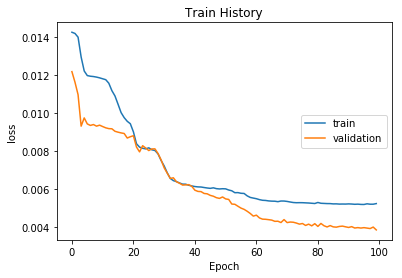

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()
    
show_train_history(train_history, 'loss', 'val_loss')

### Model Compare

### 1. 寬

In [17]:
model1 = Sequential()
model1.add(Dense(200, input_dim=8, activation='relu', name='dense1')) 
model1.add(Dense(1, activation='relu', name='output_layer')) 
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 200)               1800      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 201       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
model1.compile(loss='MSE', optimizer='adam')
train_history1 = model1.fit(x=trainX, y=trainY, validation_split=0.2, epochs=100, batch_size=30, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 233us/step - loss: 0.0143 - val_loss: 0.0131
Epoch 2/100
800/800 [==============================] - 0s 31us/step - loss: 0.0143 - val_loss: 0.0131
Epoch 3/100
800/800 [==============================] - 0s 26us/step - loss: 0.0143 - val_loss: 0.0131
Epoch 4/100
800/800 [==============================] - 0s 26us/step - loss: 0.0143 - val_loss: 0.0131
Epoch 5/100
800/800 [==============================] - 0s 26us/step - loss: 0.0143 - val_loss: 0.0131
Epoch 6/100
800/800 [==============================] - 0s 26us/step - loss: 0.0143 - val_loss: 0.0131
Epoch 7/100
800/800 [==============================] - 0s 26us/step - loss: 0.0143 - val_loss: 0.0131
Epoch 8/100
800/800 [==============================] - 0s 27us/step - loss: 0.0143 - val_loss: 0.0131
Epoch 9/100
800/800 [==============================] - 0s 27us/step - loss: 0.0143 - val_loss: 0.0131
Epoch 10/100
800/800 [=============

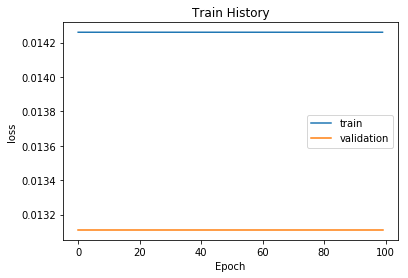

In [19]:
show_train_history(train_history1, 'loss', 'val_loss')

### 加深

In [20]:
model2 = Sequential()
model2.add(Dense(47, input_dim=8, activation='relu', name='dense1')) 
model2.add(Dense(20, activation='relu', name='dense2')) 
model2.add(Dense(20, activation='relu', name='dense3'))
model2.add(Dense(10, activation='relu', name='dense4')) 
model2.add(Dense(1, activation='relu', name='output_layer'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 47)                423       
_________________________________________________________________
dense2 (Dense)               (None, 20)                960       
_________________________________________________________________
dense3 (Dense)               (None, 20)                420       
_________________________________________________________________
dense4 (Dense)               (None, 10)                210       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 2,024
Trainable params: 2,024
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2.compile(loss='MSE', optimizer='adam')
train_history2 = model2.fit(x=trainX, y=trainY, validation_split=0.2, epochs=100, batch_size=30, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 392us/step - loss: 0.0090 - val_loss: 0.0051
Epoch 2/100
800/800 [==============================] - 0s 35us/step - loss: 0.0065 - val_loss: 0.0041
Epoch 3/100
800/800 [==============================] - 0s 33us/step - loss: 0.0057 - val_loss: 0.0039
Epoch 4/100
800/800 [==============================] - 0s 39us/step - loss: 0.0053 - val_loss: 0.0038
Epoch 5/100
800/800 [==============================] - 0s 41us/step - loss: 0.0049 - val_loss: 0.0037
Epoch 6/100
800/800 [==============================] - 0s 39us/step - loss: 0.0048 - val_loss: 0.0037
Epoch 7/100
800/800 [==============================] - 0s 42us/step - loss: 0.0047 - val_loss: 0.0037
Epoch 8/100
800/800 [==============================] - 0s 38us/step - loss: 0.0048 - val_loss: 0.0037
Epoch 9/100
800/800 [==============================] - 0s 38us/step - loss: 0.0046 - val_loss: 0.0038
Epoch 10/100
800/800 [=============

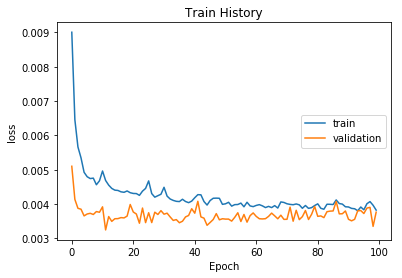

In [22]:
show_train_history(train_history2, 'loss', 'val_loss')

### 2.預測生存率

In [38]:
titanic_df_select2 = titanic_df
titanic_df_select2.columns = titanic_df_select2.columns.str.lower()
titanic_df_select2 = titanic_df_select2.drop(['ticket'], axis=1)
titanic_df_select2 = titanic_df_select2.drop(['name'], axis=1)
titanic_df_select2 = titanic_df_select2.drop(['cabin'], axis=1)
titanic_df_select2 = titanic_df_select2.drop(['passengerid'], axis=1)
titanic_df_label2 = oneHot(titanic_df_select2['survived'])
titanic_df_select2 = titanic_df_select2.drop(['survived'], axis=1)
titanic_df_select2.head()
# titanic_df_select2 = titanic_df_select2.loc[:, ['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'fare']]

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [39]:
titanic_df_select2['age'] = titanic_df_select2['age'].fillna(titanic_df_select2['age'].mean())
titanic_df_select2['fare'] = titanic_df_select2['fare'].fillna(titanic_df_select2['fare'].mean())
titanic_df_select2['sex'] = titanic_df_select2['sex'].map({'female': 0, 'male': 1}).astype(int)
titanic_df_select2['embarked'] = titanic_df_select2['embarked'].map({'C': 0, 'Q': 1, 'S':2}).astype(int)
df2 = pd.DataFrame(oneHot(titanic_df_select2['embarked']), columns= Embarked)
titanic_df_select_new2 = titanic_df_select2
titanic_df_select2 = pd.concat([titanic_df_select_new2, df2], axis=1)
titanic_df_select2['age'] = df_norm(titanic_df_select2['age'])
trainX2 = titanic_df_select2[:1000]
testX2 = titanic_df_select2[1000:]
trainY2 = titanic_df_label2[:1000]
testY2 = titanic_df_label2[1000:]

In [40]:
model3 = Sequential()
model3.add(Dense(5, input_dim=10, activation='relu'))
model3.add(Dense(2, activation='softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 12        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [41]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history3 = model3.fit(x=trainX2, y=trainY2, validation_split=0.2, epochs=50, batch_size=30, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 0s 394us/step - loss: 2.8659 - acc: 0.6175 - val_loss: 2.3376 - val_acc: 0.6250
Epoch 2/50
800/800 [==============================] - 0s 37us/step - loss: 2.3240 - acc: 0.6163 - val_loss: 1.8308 - val_acc: 0.6250
Epoch 3/50
800/800 [==============================] - 0s 35us/step - loss: 1.7958 - acc: 0.6150 - val_loss: 1.3995 - val_acc: 0.6350
Epoch 4/50
800/800 [==============================] - 0s 35us/step - loss: 1.2616 - acc: 0.5925 - val_loss: 0.9194 - val_acc: 0.6450
Epoch 5/50
800/800 [==============================] - 0s 36us/step - loss: 0.8170 - acc: 0.6238 - val_loss: 0.6392 - val_acc: 0.6900
Epoch 6/50
800/800 [==============================] - 0s 38us/step - loss: 0.6473 - acc: 0.6600 - val_loss: 0.6249 - val_acc: 0.6900
Epoch 7/50
800/800 [==============================] - 0s 38us/step - loss: 0.6302 - acc: 0.6625 - val_loss: 0.6144 - val_acc: 0.6950
Epoch 8/50
800/800 [==

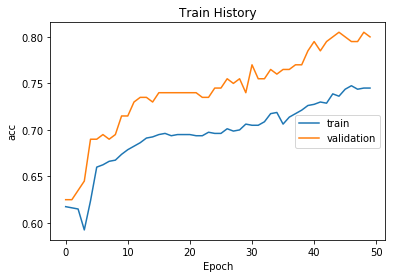

In [42]:
show_train_history(train_history3, 'acc', 'val_acc')

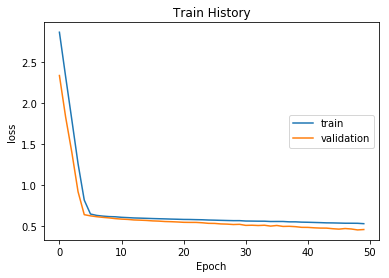

In [43]:
show_train_history(train_history3, 'loss', 'val_loss')

In [44]:
scores = model3.evaluate(x=testX2, y=testY2)
scores[1]

309/309 [==============================] - 0s 22us/step


0.8349514570822608

### Try to Overfit
1. validation_split降低
2. layer加深/ 寬(總參數變多)

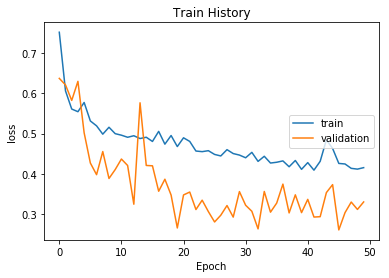

In [49]:
model4 = Sequential()
model4.add(Dense(1000, input_dim=10, activation='relu'))
model4.add(Dense(500, activation='relu'))
model4.add(Dense(100, activation='relu'))
model4.add(Dense(25, activation='relu'))
model4.add(Dense(20, activation='relu'))
model4.add(Dense(2, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history4 = model4.fit(x=trainX2, y=trainY2, validation_split=0.1, epochs=50, batch_size=30, verbose=0)
show_train_history(train_history4, 'loss', 'val_loss')

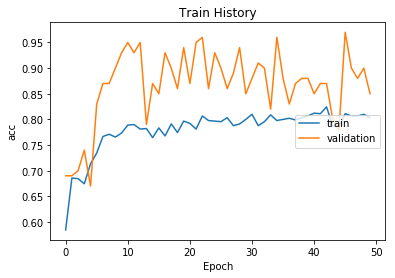

In [50]:
show_train_history(train_history4, 'acc', 'val_acc')